In [4]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [5]:
# Define parameters for the true signal
fs = 100  
t = np.arange(1000) / fs 
true_freqs = [5, 10]  
true_amps = [1.0, 0.5] 
true_angular_freqs = [2 * np.pi * f for f in true_freqs]

In [6]:
# True signal
true_data = sum(
    true_amps[n] * np.exp(-1j * true_angular_freqs[n] * t)
    for n in range(len(true_freqs))
)

In [7]:
# Noise
noise_level = 0.1
noisy_data = true_data + noise_level * (np.random.normal(0, 1, len(t)) + 1j * np.random.normal(0, 1, len(t)))

In [11]:
# Define the model function 
def complex_exponential_model(t, *params):
    num_exponentials = len(params) // 2
    result = np.zeros_like(t, dtype=complex)
    for i in range(num_exponentials):
        amp = params[2 * i]
        freq = params[2 * i + 1]
        result += amp * np.exp(-1j * freq * t)
    return result.real

In [12]:
# Initial guess for parameters
initial_guess = [
    0.1, 31.41,  # First exponential
    0.2, 62.83 # Second exponential
]

In [13]:
# Fit the model to the real part of the noisy data
params, covariance = curve_fit(lambda t, *p: complex_exponential_model(t, *p).real, t, noisy_data.real, p0=initial_guess)

In [14]:
# Extract estimated parameters
estimated_amps = params[0::2]
estimated_freqs = params[1::2]
estimated_freqs = np.array(estimated_freqs) / (2 * np.pi)  

print("True frequencies:", true_freqs)
print("Estimated frequencies:", estimated_freqs)
print("True amplitudes:", true_amps)
print("Estimated amplitudes:", estimated_amps)

# Find the smallest frequency
true_smallest_freq = min(true_freqs)
estimated_smallest_freq = min(estimated_freqs)
frequency_error = abs(estimated_smallest_freq - true_smallest_freq)

print("True smallest frequency:", true_smallest_freq)
print("Estimated smallest frequency (NLLS):", estimated_smallest_freq)
print("Absolute error in smallest frequency:", frequency_error)

True frequencies: [5, 10]
Estimated frequencies: [5.00013015 9.99983555]
True amplitudes: [1.0, 0.5]
Estimated amplitudes: [0.99859262 0.5039765 ]
True smallest frequency: 5
Estimated smallest frequency (NLLS): 5.000130150880537
Absolute error in smallest frequency: 0.0001301508805369167


Text(0.5, 1.0, 'NLLS fit')

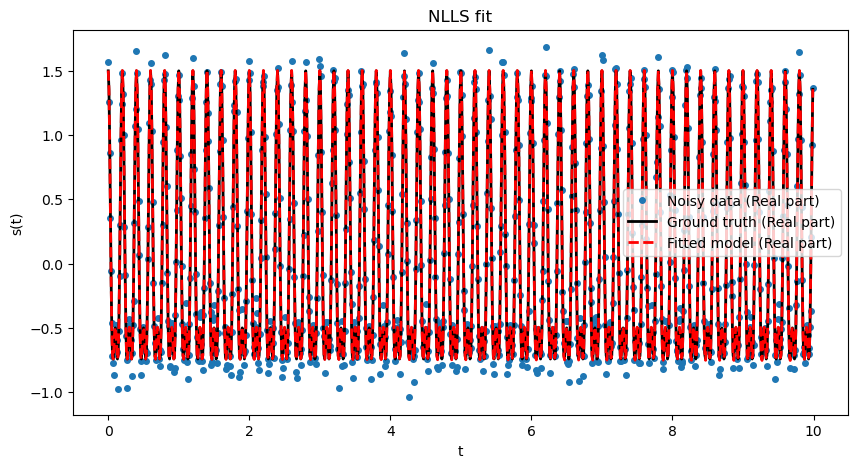

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(t, noisy_data.real, 'o', label="Noisy data (Real part)", markersize=4)
plt.plot(t, true_data.real, label="Ground truth (Real part)", linewidth=2, color="black")
plt.plot(t, complex_exponential_model(t, *params).real, '--', label="Fitted model (Real part)", linewidth=2, color="red")
plt.legend()
plt.xlabel("t")
plt.ylabel("s(t)")
plt.title("NLLS fit")

In [19]:
print("MAE of GT and fitted model: ", np.mean(np.abs(true_data.real - complex_exponential_model(t, *params).real )))

MAE of GT and fitted model:  0.0038118643552953846


In [17]:
2 * np.pi * 5.0, 2 * np.pi * 10.0

(31.41592653589793, 62.83185307179586)